<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [10]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File

In [11]:
df = pd.read_csv( 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [13]:
df.shape

(346, 10)

In [187]:
df.isna().sum()  # There are no missing data

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dayofweek         0
weekend           0
dtype: int64

### Convert to date time object


In [14]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [15]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [16]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

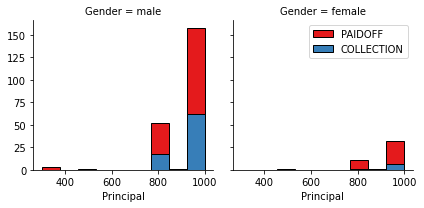

In [17]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

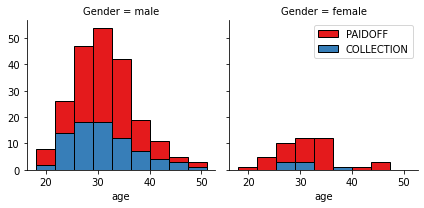

In [18]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


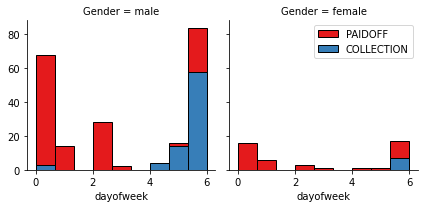

In [19]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [20]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [21]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [22]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [23]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [24]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [25]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [86]:
X_train = Feature
X_train[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [27]:
y_train = df['loan_status'].values
y_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Split the Loan_train.csv data  to optimize the training of the  model

In [87]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [99]:
scaled_X_train = scaler.fit_transform(X_train) # X_train is use to finally train the model ofter hyperparameter tuning 
#scaled_X_train[0:5]

In [100]:
# scalling of the split training data used during hyperparameter tuning
scaled_X_train1 = scaler.fit_transform(X_train1)
scaled_X_test1 = scaler.transform(X_test1)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


### Seaching for best n-Neighbors (k) value using for loop and plot method

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [128]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn_model = KNeighborsClassifier(n_neighbors = n).fit(X_train1,y_train1)
    yhat= knn_model.predict(X_test1)
     
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat)

    
    std_acc[n-1]= np.std(yhat==y_test1)/np.sqrt(yhat.shape[0])

mean_acc


array([0.7       , 0.75714286, 0.7       , 0.78571429, 0.74285714,
       0.75714286, 0.75714286, 0.77142857, 0.74285714, 0.78571429,
       0.77142857, 0.78571429, 0.77142857, 0.78571429, 0.75714286,
       0.78571429, 0.75714286, 0.77142857, 0.75714286])

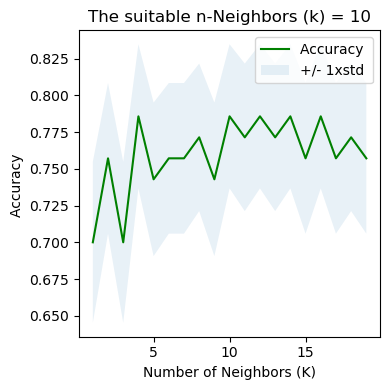

In [109]:
plt.figure(figsize=(4,4), dpi=(100))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.title('The suitable n-Neighbors (k) = 10')
plt.tight_layout()
plt.show()

In [104]:
# @hidden_cell
#print("The best accuracy was with", np.round(mean_acc.max(),2), "with k =", mean_acc.argmax()+1) 

### Seaching for best n-Neighbors (k) value and other hyperparameters using GridsearchCV method

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
knn_modelll = KNeighborsClassifier()
param_grid = {'n_neighbors':[3, 4, 8, 10, 11],'leaf_size':[10, 15, 20, 30], 'n_jobs':[1, 2]}
knn_grid = GridSearchCV(knn_modelll, param_grid, cv=10)

In [119]:
knn_grid.fit(X_train1,y_train1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 15, 20, 30], 'n_jobs': [1, 2],
                         'n_neighbors': [3, 4, 8, 10, 11]})

In [120]:
knn_grid.best_score_

0.7502645502645502

In [121]:
# Nuber of neighnors (K) = 10 from GridsearchCV
knn_grid.best_params_

{'leaf_size': 20, 'n_jobs': 1, 'n_neighbors': 10}

In [122]:
knn_pred = knn_grid.predict(X_test1)

In [124]:
# Training Evaluation classification report: knn_model performs poorly in predicting class label 1, COLLECTION (loan defaulters)

from sklearn.metrics import classification_report
print(classification_report(y_test1,knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        56
           1       0.00      0.00      0.00        14

    accuracy                           0.79        70
   macro avg       0.40      0.49      0.44        70
weighted avg       0.64      0.79      0.70        70



## Building the final training KNN_model  
#### The algorithm was train with k = 10 and other hyperparameters obtain from GridsearchCV, using the entire loan_train-csv data

In [125]:
#Train Model  
knn_model = KNeighborsClassifier(n_neighbors = 10, leaf_size = 20, n_jobs = 1).fit(X_train,y_train)

# Decision Tree


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
DTree_model = DecisionTreeClassifier(class_weight='balanced')

In [46]:
# GridSearchCV done to find best model parameters
param_grid = {'max_depth':[2, 3, 4, 6, 8],'min_samples_split':[2, 4, 5, 6], 'criterion':["gini","entropy"]}
DTree_grid = GridSearchCV(DTree_model, param_grid, cv=20)
DTree_grid.fit(X_train1, y_train1)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8],
                         'min_samples_split': [2, 4, 5, 6]})

In [47]:
DTree_grid.best_score_

0.7016483516483518

In [48]:
DTree_grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5}

In [49]:
DTree_pred = DTree_grid.predict(X_test1)

In [50]:
# DT_model performs much better during the training than knn_model in predicting class label 1 (COLLECTION class of loan defalters)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test1,DTree_pred))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67        56
           1       0.31      0.86      0.45        14

    accuracy                           0.59        70
   macro avg       0.62      0.69      0.56        70
weighted avg       0.81      0.59      0.62        70



### Building the final Decision_Tree training model using the entire loan_train.csv data and tuned hyperparameters

In [126]:
DTree_model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 5, criterion= 'entropy', class_weight='balanced')
DTree_model = DTree_model.fit(X_train, y_train)

# Support Vector Machine


In [183]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [184]:
svm = SVC(class_weight='balanced')
param_grid = {'C':[0.1, 0.15, 0.5, 1],'kernel':['rbf'],'gamma':[0.1, 0.12, 0.13]}
svm_grid = GridSearchCV(svm, param_grid, cv=10) 

In [185]:
svm_grid.fit(X_train1, y_train1)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 0.15, 0.5, 1], 'gamma': [0.1, 0.12, 0.13],
                         'kernel': ['rbf']})

In [186]:
svm_grid.best_score_

0.7318783068783068

In [178]:
svm_grid.best_params_

{'C': 0.1, 'gamma': 0.12, 'kernel': 'rbf'}

In [179]:
svm_pred = svm_grid.predict(X_test1)

In [180]:
# DT_model performs much better than knn_model in predicting class label 1, the COLLECTION class (loan defalters)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test1,svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        56
           1       0.10      0.07      0.08        14

    accuracy                           0.69        70
   macro avg       0.44      0.46      0.45        70
weighted avg       0.65      0.69      0.66        70



### SVM FINAL MODEL TRAINING done on entire loan_train.csv data

In [182]:
 svm_model = SVC(class_weight='balanced',C = 0.1, gamma = 0.12, kernel = 'rbf' ).fit(X_train, y_train)

# Logistic Regression


In [61]:
from sklearn.linear_model import LogisticRegression

In [202]:
LogR_model = LogisticRegression(class_weight='balanced', random_state = 42, max_iter=10000)

param_grid = {'C':[0.01, 0.5, 1.0, 1.5], 'solver':['liblinear', 'lbfgs'], 'penalty':['l2']}
Log_grid_model = GridSearchCV(LogR_model, param_grid, cv=10)

Log_grid_model.fit(X_train1, y_train1)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42),
             param_grid={'C': [0.01, 0.5, 1.0, 1.5], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [203]:
Log_grid_model.best_score_

0.6706349206349207

In [204]:
Log_grid_model.best_params_

{'C': 1.5, 'penalty': 'l2', 'solver': 'lbfgs'}

In [205]:
LogR_pred = Log_grid_model.predict(X_test1)

In [242]:
# LogR_model performs much better than knn_model in predicting class label 1, the COLLECTION class (loan defalters)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test1,LogR_pred))

              precision    recall  f1-score   support

           0       0.93      0.50      0.65        56
           1       0.30      0.86      0.44        14

    accuracy                           0.57        70
   macro avg       0.62      0.68      0.55        70
weighted avg       0.81      0.57      0.61        70



### LOGISTIC REGRESSION final model training done on entire loan_train.csv data

In [243]:
LogR_model = LogisticRegression(class_weight='balanced', C = 1.5, penalty= 'l2', solver= 'liblinear', 
                                random_state = 42, max_iter=10000).fit(X_train, y_train)

# Model Evaluation using Test set



In [209]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [69]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Loading Test set for evaluation


In [210]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### loan_test.csv data cleaning and X_test, y_test feature extraction

In [211]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [218]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek  # converting an effective_date to 'datofweek'

In [220]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)  # categorizing 'dayofweek' into 0 and 1
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,weekend,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,0,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,1,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,1,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,1,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,1,6


In [221]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,weekend,dayofweek
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,0,3
1,5,5,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0,1,4
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,1,5
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,college,0,1,5
4,35,35,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0,1,6


In [222]:
Test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
Test_Feature = pd.concat([Test_Feature,pd.get_dummies(test_df['education'])], axis=1)
Test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
Test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [223]:
X_test = Test_Feature
X_test[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [224]:
y_test = test_df['loan_status'].values
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Normalization

In [225]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(54, 8)

## Model predictions   and corresponding metrics

In [236]:
Knn_predictions = knn_model.predict(scaled_X_test)

KNN_Accuracy_Score = metrics.accuracy_score(Knn_predictions, y_test)
KNN_JaccardIndex = metrics.jaccard_score(Knn_predictions, y_test, average='weighted' )
KNN_F1_Score = metrics.f1_score(Knn_predictions, y_test, average='weighted')

#pos_label=1, average='binary'

In [237]:
DTree_predictions = DTree_model.predict(scaled_X_test)

DTree_Accuracy_Score = metrics.accuracy_score(DTree_predictions, y_test)
DTree_JaccardIndex = metrics.jaccard_score(DTree_predictions, y_test, average='weighted')
DTree_F1_Score = metrics.f1_score(DTree_predictions, y_test, average='weighted')

In [238]:
svm_predictions = svm_model.predict(scaled_X_test)

SVM_Accuracy_Score = metrics.accuracy_score(svm_predictions, y_test)
SVM_JaccardIndex = metrics.jaccard_score(svm_predictions, y_test, average='weighted')
SVM_F1_Score = metrics.f1_score(svm_predictions, y_test, average='weighted')

In [244]:
LogR_predictions = LogR_model.predict(scaled_X_test)
LogR_pred_proba = LogR_model.predict_proba(X_test)

LogR_Accuracy_Score = metrics.accuracy_score(LogR_predictions, y_test)
LogR_JaccardIndex = metrics.jaccard_score(y_test, LogR_predictions, average='weighted')
LogR_F1_Score = metrics.f1_score( y_test, LogR_predictions, average='weighted')
LogR_Log_Loss = metrics.log_loss(y_test, LogR_pred_proba)

# Model Performance Reports

In [245]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression', 'KNN', 'SVM', 'Decision Tree']})


Report['Accuracy'] = [LogR_Accuracy_Score, KNN_Accuracy_Score, SVM_Accuracy_Score, DTree_Accuracy_Score]
Report['Jaccard'] = [LogR_JaccardIndex, KNN_JaccardIndex, SVM_JaccardIndex, DTree_JaccardIndex]
Report['F1-Score'] = [LogR_F1_Score, KNN_F1_Score, SVM_F1_Score, DTree_F1_Score]
Report['LogLoss'] = [ LogR_Log_Loss, 'N/A', 'N/A', 'N/A']
Report

,Algorithm,Accuracy,Jaccard,F1-Score,LogLoss
0,LogisticRegression,0.592593,0.448177,0.615741,11.672066
1,KNN,0.740741,0.740741,0.851064,N/A
2,SVM,0.666667,0.484095,0.646078,N/A
3,Decision Tree,0.722222,0.550999,0.705190,N/A


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
